In [ ]:
## importamos algumas bibliotecas que serão usadas
import numpy as np  # Para um mínimo de matemática
import matplotlib.pyplot as plt # Para gráficos
import sys

# MAP5729 - EP5: Integração numérica


**Nome: Narayan Shimanoe Lisboa**


**Número USP: 14600141**

**Turma: 2 (João)**

<p align = "justify">O objetivo deste EP é implementar métodos de integração numérica. Focaremos na fórmula dos trapézios composta, e, em particular, no método de extrapolação de Romberg, que permite definir recursivamente fórmulas de integração de ordem mais elevada. Aplicaremos esses métodos a um problema de cálculo de volumes. </p>

**Orientações:**
- Salve uma cópia deste notebook para editá-lo.
- Utilize o índica à esquerda para identificar as questões que precisam ser respondidas.
- As respostas das questões deverão ser respondidas nos espaços indicados abaixo.
- Envie o link do seu notebook na página de entrega da atividade no Moodle da disciplina.
- Data limite de entrega: **23/06**

<font color='red'>
IMPORTANTE: os problemas descritos neste EP dependem de parâmetros escolhidos em função de seu número USP.

Complete e rode a célula abaixo para obter esses parâmetros$.
</font>



In [ ]:
nusp = 14600141


xmax = nusp%10
altura = 723. + nusp%100 * (735.-723.)/100

print("Parâmetro xmax = ", xmax)
print("Parâmetro altura = ", altura)

Parâmetro xmax =  1
Parâmetro altura =  727.92


#Parte 1 - A fórmula dos trapézios


A fórmula dos trapézios aproxima a integral definida

\begin{equation}
  \int_a^b f(x)dx
\end{equation}

onde $a \neq b$, pela integral do único polinômio $p_1$ de grau menor ou igual a $1$ que interpola $f$ em $x_0 = a$ e $x_1 = b$. Temos

\begin{equation}
  p_1(x) = \frac{x-b}{a-b}f(a) + \frac{x-a}{b-a}f(b)
\end{equation}

Temos então

\begin{equation}
  \int_a^b f(x)dx \approx \int_a^b p_1(x) = \frac{b-a}{2} \left[f(a) + f(b)\right]
\end{equation}


## Questão 1.1.

Implemente a função *integral_trapezio*, que recebe um vetor $[a,b]$, um vetor $[f(a),f(b)]$ e retorna a aproximação de $\int_a^bf(x)dx$ dada pela fórmula dos trapézios.

In [ ]:
def integral_trapezio(x,y):
  """
  Calcula a aproximação de uma integral definida usando a fórmula do trapézio

  Entradas:
  - x: vetor com os pontos a e b (limites de integração)
  - y: vetor com os valores de f(a) e f(b)

  Saída:
  - T: aproximação de int_a^bf(x)dx dada pela fórmula do trapézio
  """

  T = (x[1] - x[0])/2 * (y[1] + y[0])

  return T

## Questão 1.2.

Valide a implementação da função acima usando-a para aproximar as integrais:

\begin{equation}
  \int_0^{x_{max}} x dx, \qquad \int_0^{x_{max}} x^2 dx, \qquad \int_0^{x_{max}} e^x dx
\end{equation}

onde $x_{max}$ é o parâmetro definido em função de seu número USP no começo deste EP. Em quais casos a fórmula dos trapézios fornece o valor exato da integral?

**Resposta:** Apenas quando a função a ser entregrada é $f(x) = x$. Pois como a função já é um polinômio de grau 1, a aproximação é perfeita, e o resultado da integral é exato.
Para as outras duas funções. Ambas são curvas, então ao paroximalas pelo méotodo do trapézio, ou seja, por uma linha reta, introduz um erro que reflena na diferença do resultado aproximado mostrado abaixo.


In [ ]:
## Vetor com os limites de integração
a = 0
b = xmax
x = np.array([a,b])

## Vetores com as ordenadas
y1 = x       ## 1a integral
y2 = x**2      ## 2a integral
y3 = np.exp(x)      ## 3a integral

## Integrais exatas
ex1 = (b**2)/2 - (a**2)/2      ## 1a integral
ex2 = (b**3)/3 - (a**3)/3 ## 2a integral
ex3 = np.exp(b) - np.exp(a)     ## 3a integral

## Integrais aproximadas
T1 = integral_trapezio(x, y1)       ## 1a integral
T2 = integral_trapezio(x, y2)       ## 2a integral
T3 = integral_trapezio(x, y3)       ## 3a integral

print("Integral 1 - exata: {}".format(ex1))
print("Integral 1 - aproximada: {}".format(T1))
print("")
print("Integral 2 - exata: {}".format(ex2))
print("Integral 2 - aproximada: {}".format(T2))
print("")
print("Integral 3 - exata: {}".format(ex3))
print("Integral 3 - aproximada: {}".format(T3))

Integral 1 - exata: 0.5
Integral 1 - aproximada: 0.5

Integral 2 - exata: 0.3333333333333333
Integral 2 - aproximada: 0.5

Integral 3 - exata: 1.718281828459045
Integral 3 - aproximada: 1.8591409142295225


Uma melhor aproximação pode ser obtida dividindo o intervalo $[a,b]$ em subintervalos e aplicando a fórmula do trapézio em cada um deles. Considere os $m+1$ pontos igualmente espaçados

\begin{equation}
  x_i = a + ih, \qquad i = 0, \dots, m, \qquad h = \frac{b-a}{m}
\end{equation}

A **fórmula de $m$-trapézios** é dada por

\begin{equation}
  \int_a^b f(x)dx  = \sum_{i=1}^m \int_{x_{i-1}}^{x_i} f(x)dx \approx \sum_{i=1}^m \frac{x_{i}-x_{i-1}}{2} \left[f(x_{i}) - f(x_{i-1})\right] = \frac{h}{2}\sum_{i=1}^m \left[f(x_{i}) - f(x_{i-1})\right]
\end{equation}

## Questão 1.3.

Complete a função *formula_trapezios_composta*, que recebe um vetor de pontos $[x_0, \dots, x_m]$, o respectivo vetor de ordenadas $[f(x_0), \dots, f(x_m)]$ e retorna a aproximação de $\int_a^bf(x)dx$ dada pela fórmula dos $m$-trapézios. Sua função deve chamar a função *integral_trapezio* definida acima.

In [ ]:
def formula_trapezios_composta(x,y):
  """
  Calcula a aproximação de uma integral definida por meio da fórmula dos m-trapézios

  Entradas:
  - x: vetor com m+1 pontos igualmente espaçados entre a e b, com x_0 = a e x_m = b
  - y: vetor com m+1 valores de f(x)

  Saída:
  - T: aproximação de int_a^bf(x)dx dada pela fórmula dos m-trapézios
  """

  T = 0
  for i in range(1,len(x)):
    T = T + integral_trapezio(x[i-1:i+1], y[i-1: i+1])

  return T

## Questão 1.4.

Valide a implementação da função acima usando-a para aproximar as integrais:

\begin{equation}
  \int_0^{x_{max}} x^2 dx, \qquad \int_0^{x_{max}} e^x dx
\end{equation}

nos casos $m \in \{1,2,5,10,20\}$. Verifique que o erro diminui à medida que $m$ aumenta.


In [ ]:
## Limites de integração
a = 0
b = xmax

## Integrais exatas
ex1 = (b**3)/3 - (a**3)/3 # em que a = 0.
ex2 = np.exp(b) - np.exp(a)

for m in [1,2,5,10,20]:

  ## Pontos igualmente espaçados
  h = (b-a)/m       ## passo
  x = np.array([a + i*h for i in range(m+1)])   ## vetor de pontos

  ## Vetor de ordenadas
  y1 = x**2       ## 1a integral
  y2 = np.exp(x)       ## 2a integral

  ## Integrais aproximadas
  T1 = formula_trapezios_composta(x,y1)       ## 1a integral
  T2 = formula_trapezios_composta(x,y2)       ## 2a integral

  print("Integral 1 - exata: {}".format(ex1))
  print("Integral 1 - m = {}: {}".format(m,T1))
  print("")
  print("Integral 2 - exata: {}".format(ex2))
  print("Integral 2 - m = {}: {}".format(m,T2))
  print("")

Integral 1 - exata: 0.3333333333333333
Integral 1 - m = 1: 0.5

Integral 2 - exata: 1.718281828459045
Integral 2 - m = 1: 1.8591409142295225

Integral 1 - exata: 0.3333333333333333
Integral 1 - m = 2: 0.375

Integral 2 - exata: 1.718281828459045
Integral 2 - m = 2: 1.7539310924648255

Integral 1 - exata: 0.3333333333333333
Integral 1 - m = 5: 0.34

Integral 2 - exata: 1.718281828459045
Integral 2 - m = 5: 1.7240056197827878

Integral 1 - exata: 0.3333333333333333
Integral 1 - m = 10: 0.335

Integral 2 - exata: 1.718281828459045
Integral 2 - m = 10: 1.7197134913893146

Integral 1 - exata: 0.3333333333333333
Integral 1 - m = 20: 0.33375000000000005

Integral 2 - exata: 1.718281828459045
Integral 2 - m = 20: 1.718639788925221



## Questão 1.5.

Denote por $T(m)$ a aproximação de $\int_a^b f(x)dx$ dada pela fórmula dos $m$-trapézios. Sabemos que o erro cometido nessa aproximação satisfaz

\begin{equation}
  |E(m)| := \left|\int_a^b f(x)dx - T(m)\right| \leq \frac{M_2}{12m^2}(b-a)^3 = \frac{M_2}{12}(b-a)h^2   
\end{equation}

onde $M_2 := \max_{x \in [a,b]} |f''(x)|$. Dizemos que a fórmula dos trapézios composta **converge com ordem $2$** para a integral exata, ou seja, à medida que o espaçamento $h$ entre os pontos equidistantes diminui, o erro diminui proporcionalmente a $h^2$. Denotamos $|E(m)| = \mathcal{O}(h^2)$.

A ordem de convergência pode ser estimada numericamente e comparada com seu valor teórico. Suponha que sejam feitas duas aproximações para $\int_a^bf(x)dx$, com os números de intervalos $m_1 := (b-a)/h_1$ e $m_2 := (b-a)/h_2$, resultando nos respectivos erros $|E(m_1)|$ e $|E(m_2)|$. Se o método converge com ordem $p$, ou seja, $|E(m)| = \mathcal{O}(h^p)$, então, para $h$ suficientemente pequeno, existe uma constante $C$ tal que

\begin{equation}
  |E(m_1)| \approx C h_1^p, \qquad |E(m_2)| \approx C h_2^p
  \tag{1}
\end{equation}



A partir de (1), determine uma expressão permitindo estimar $p$. A seguir, complete a função *ordem_convergencia_numerica*, que recebe um vetor com tamanhos de passo $[h_1, \dots, h_q]$ e um vetor com os respectivos erros $[E(m_1), \dots, E(m_q)]$. Essa função estima e imprime $p$ para cada par de aproximações consecutivas, ou seja, a função estima valores de $p$ usando $E(m_1),E(m_2)$, usando $E(m_2),E(m_3)$, etc.

**Resposta**:
- Expressão para estimar $p$:
\begin{equation}
  p = \frac{\ln(|E(m_1)|/|E(m_2)|)}{\ln(h_1/h_2)}
\end{equation}

In [ ]:
def ordem_convergencia_numerica(hs,erros):
  """
  Estima a ordem de convergência de uma aproximação numérica
  Uma estimativa de p é feita para cada par de erros consecutivos |E_{i-1}|, |E_{i}|,
  correspondendo respectivamente aos passos $h_{i-1}$ e $h{i}$

  Entradas:
  - hs: vetor com os tamanhos de passo [h_1, ..., h_q]
  - erros: vetor com os erros [E(m_1), ..., E(m_q)]
  """

  print("Ordem de convergência estimada numericamente:")
  for i in range(1,len(hs)):
    p_estimado = np.log(erros[i-1]/erros[i]) / np.log(hs[i-1]/hs[i])
    print("p = {}".format(p_estimado))

 ## Questão 1.6.

 Utilize a fórmula dos trapézios composta, com $m \in \{1,2,4,8,16,32\}$ para aproximar

\begin{equation}
  \int_0^{x_{max}} e^x dx
\end{equation}

armazenando os erros de cada simulação em um vetor, bem como os respectivos valores de $h$. Utilize a função *ordem_convergencia_numerica* para imprimir a ordem de convergência estimada. Plote também o vetor de erros em função de $h$, em escala bilogarítmica, que provavelmente resultará em uma gráfico próximo a uma reta. Qual a inclinação aproximada dessa reta?

**Resposta:**
- O valor estimado de $p$ condiz com o valor teórico? :
- Inclinação da reta obtida em escala bilogarítmica:

Ordem de convergência estimada numericamente:
p = 1.9823084271893558
p = 1.9955132750423934
p = 1.998874255577535
p = 1.9997183087703505
p = 1.999929561230317


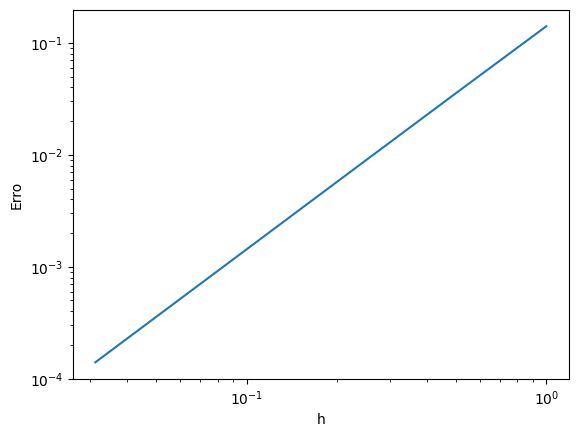

In [ ]:
## Limites de integração
a = 0
b = xmax

## Integral exata
ex = np.exp(b) - np.exp(a)

## Inicializar o vetor de erros
erros = np.empty(0,dtype = float)

## Inicializar o vetor de espaçamentos h
hs = np.empty(0,dtype = float)

## Uma aproximação para cada valor de m
for m in [1,2,4,8,16,32]:

  ## Pontos igualmente espaçados
  h = (b-a) / m   ## tamanho do passo
  x = np.array([a + i*h for i in range(m+1)])  ## vetor com os pontos

  ## Vetor de ordenadas
  y = np.exp(x)

  ## Integral aproximada
  T = formula_trapezios_composta(x,y)

  ## Guardar os resultados
  hs = np.append(hs,h)
  erros = np.append(erros,np.abs(ex-T))

## Estimar ordem de convergência
ordem_convergencia_numerica(hs,erros)

plt.plot(hs,erros)
plt.xlabel("h")
plt.ylabel("Erro")
plt.xscale("log")
plt.yscale("log")
plt.show()

# Parte 2 - Método de extrapolação de Romberg

O método de extrapolação de Romberg é um método de integração numérica que, usando diferentes aproximações dadas fórmula dos trapézios, permite obter aproximação de ordem maior que $2$ de forma recursiva.

Pode-se mostrar que o erro na fórmula dos $m$-trapézios satisfaz

\begin{equation}
  \int_a^b f(x)dx = T(m) + C_2h^2 + C_4h^4 + C_6h^6 + \dots
  \tag{2}
\end{equation}

onde $C_2,C_4,C_6,\dots$ são constantes. Aproximando a integral com o dobro de subintervalos, obtemos, a partir da Eq. (2),

\begin{equation}
  \int_a^b f(x)dx = T(2m) + C_2\left(\frac{h}{2}\right)^2 + C_4\left(\frac{h}{2}\right)^4 + C_6\left(\frac{h}{2}\right)^6 + \dots
  \tag{3}
\end{equation}

Multiplicando a Eq. (3) por $4$ e subtraindo a Eq. (2), obtemos

\begin{equation}
  4\int_a^b f(x)dx  - \int_a^b f(x)dx = 4 \left(T(2m) + C_2\left(\frac{h}{2}\right)^2 + C_4\left(\frac{h}{2}\right)^4 + C_6\left(\frac{h}{2}\right)^6 + \dots\right) - \left(T(m) + C_2h^2 + C_4h^4 + C_6h^6 + \dots\right)
\end{equation}

de onde obtemos

\begin{equation}
  \begin{aligned}
  \int_a^b f(x)dx & = \color{red}{\frac{4T(2m) - T(m)}{3}} - \frac{C_4}{4}h^4 - \frac{5}{16}C_6 h^6 + \dots \\
  &= \color{red}{T_1(m)} - \frac{C_4}{4}h^4 - \frac{5}{16}C_6 h^6 + \dots
  \end{aligned}
  \tag{4}
\end{equation}

onde

\begin{equation}
  T_1(m) := \frac{4T(2m) - T(m)}{3}
\end{equation}

A Eq. (4) indica que a fórmula de integração $T_1$ é uma **aproximação de quarta ordem** para $\int_a^bf(x)dx$. Podemos repetir essa construção. Usando $T_1$ com o dobro de intervalos, obtemos, a partir da Eq. (4),

\begin{equation}
  \begin{aligned}
  \int_a^b f(x)dx = T_1(2m) - \frac{C_4}{4}\left(\frac{h}{2}\right)^4 - \frac{5}{16}C_6 \left(\frac{h}{2}\right)^6 + \dots
  \end{aligned}
  \tag{5}
\end{equation}

Multiplicando (5) por 16 e subtraindo (4), obtemos uma **aproximação de sexta ordem** para $\int_a^b f(x)dx$:

\begin{equation}
  \begin{aligned}
  \int_a^b f(x)dx & = \color{blue}{\frac{16T_1(2m) - T_1(m)}{15}} + Ch^6 \\
  &= \color{blue}{T_2(m)} + C_6 h^6 + \dots
  \end{aligned}
  \tag{4}
\end{equation}

onde

\begin{equation}
  T_2(m) := \frac{16T_1(2m) - T_1(m)}{15}
\end{equation}

O procedimento descrito acima é conhecido como **método de extrapolação de Romberg**. Definindo $T_0(m) = T(m)$ (a fórmula dos $m$-trapézios usual), temos, de forma geral,

\begin{equation}
  T_k(m) := \frac{4^k T_{k-1}(2m) - T_{k-1}(m)}{4^k - 1}, \qquad k = 1,2,3,\dots
  \tag{6}
\end{equation}

O método pode ser implementado na forma da seguinte tabela:

\begin{array}{|c|c|} \hline
  m & T_0 & T_1 & T_2  & T_3 & \dots \\ \hline
  m_0 & T_0(m_0) & T_1(m_0) & T_2(m_0) & T_3(m_0) & \dots  \\
  2m_0 & T_0(2m_0) & T_1(2m_0) & T_2(2m_0) & T_3(2m_0) \\
  4m_0 & T_0(4m_0) & T_1(4m_0) & T_2(4m_0) & \vdots \\
  8m_0 & T_0(8m_0) & T_1(8m_0) & \vdots & T_3(2^{M-3}m_0) \\
  16m_0 & T_0(16m_0) & \vdots & T_2(2^{M-2}m_0) \\
  \vdots & \vdots & T_1(2^{M-1}m_0) &  \\
  2^Mm_0 & T_0(2^Mm_0) \\\hline
\end{array}

Primeiramente, calculam-se os valores da coluna $T_0$ usando a fórmula dos $m$-trapézios, com os respectivos valores de $m$. Podemos, por exemplo, começar com $m_0 = 1$, que corresponde ao método dos trapézios sem repetição, mas é possível começar com $m_0 > 1$. A seguir, calculam-se os valores da coluna $T_1$ usando (6), com $k=1$; a seguir, calculam-se os valores da coluna $T_2$ usando (6), com $k=2$, e assim por diante. **Os valores da coluna $T_k$ fornecem uma aproximação de ordem $2k+2$ para $\int_a^bf(x)dx$**.

## Questão 2.1.

Escreva a função *extrapolacao_romberg*, que implementa o método de extrapolação de Romberg. A função recebe o valor de $m_0$ (inteiro maior ou igual a $1$), o valor máximo de $M$ (tal que $m=2^Mm_0$ seja o maior múltiplo inteiro de $m_0$), um inteiro $k_{max}$ (maior índice de $T_k$), um vetor com pelo menos $Mm_0+1$ pontos $x_i$ e um vetor com as respectivas ordenadas $y_i$. Os valores $T_k(m)$ são armazenados em uma matriz com $M+1$ linhas e $k_{max}+1$ colunas, seguindo a estrutura da tabela apresentada acima. No cálculo dos valores na colunas $T_0$, adotam-se $m+1$ pontos equidistantes entre os pontos dados.

In [ ]:
def extrapolacao_romberg(m0,M,kmax,x,y):
  """
  Calcula a aproximação de uma integral definida por meio do método de extrapolação de Romberg

  Entradas:
  - m0: valor inicial de m (inteiro maior ou igual a 1)
  - M: inteiro tal que m = 2^M*m0 seja o maior múltiplo inteiro de m0
  - kmax: maior índice de T_k (inteiro maior ou igual a 1)
  - x: vetor com pelo menos M*m0+1 pontos
  - y: vetor com as respectivas ordenadas

  Saída:
  - T: matriz com M+1 linhas e kmax+1, onde o elemento (i,k) é T_k(2^i * m0), i = 0,...,M, k = 0,...,kmax
  """

  ## inicializa a matriz para armazenar as aproximações T_k(2^i * m0)
  T = np.zeros((M+1,kmax+1))

  ## Cálculo de T_0(m) para vários valores de m
  ## usando a fórmula dos m-trapézios
  ## Percorremos as potências de 2
  for i in range(M+1):

    ## Determinação do número de intervalos
    m = m0 * (2**i)
    m = int(m)  ## transformar em inteiro

    ## Se quisermos um número de intervalos maior que o disponível -> Erro
    if m > x.size - 1:
      sys.exit("Erro: não é possível usar a fórmula dos {}-trapézios pois existem apenas {}pontos".format(m,x.size))


    ## Obter subvetores de x e y, com m+1 pontos igualmente espaçados, incluindo os extremos
    ## Construimos um vetor contendo os índices que formarão o subvetor
    ##      por exemplo, se temos o vetor x = [x_0, ..., x_16]
    ##      o subvetor com $4$ intervalos será [x_0,x_4,x_8,x_12,x_16]
    ##      de modo que indices = [0,4,8,12,16]
    indices = np.linspace(0, x.size -1, m+1, dtype=int)
    x_m = x[indices]   ## subvetor de x
    y_m = y[indices]   ## subvetor de y

    ## Cálculo de T_0(2^i*m0) (fórmula dos trapézios composta)
    ## armazenando o valor na matriz T
    T[i,0] = formula_trapezios_composta(x_m, y_m)

  ## Interpolação de Romberg
  ## Percorremos as colunas de T, a partir da coluna T_1
  for k in range(1,kmax+1):
    ## Percorremos as linhas (uma a menos em comparação à coluna anterior)
    for i in range(0,M+1-k):
      ## Cálculo de T_m(2^i*m0)
      numerador = (4**k) * T[i+1, k-1] - T[i, k-1]
      ## Cálculo de T_m(2^i*m0)
      T[i, k] = (4**k * T[i + 1, k - 1] - T[i, k - 1]) / (4**k - 1)

  return T

## Questão 2.2.

Utilize o método de Romberg para aproximar $\int_0^{x_{max}} e^x dx$. Utilize o a fórmula dos trapézios composta para calcular $T_0(1), T_0(2), T_0(4), \dots, T_0(64)$ e utilize a função *extrapolacao_romberg* para obter as aproximações $T_k$, com $1 \leq k \leq 4$.

In [ ]:
## função
def f(x):
  return np.exp(x)

## vetor com 65 pontos de interpolação equidistantes
x = np.array(np.linspace(0,xmax,65))
## vetor de ordenadas
y = f(x)

## dados para a extrapolaçãp de Romberg
m0 = 1
M = 6
kmax = 4

## Extrapolação de Romberg
T =extrapolacao_romberg(m0, M, kmax, x, y)
print("Matriz T:")
print(T)

## Integral exata
ex = np.exp(xmax) - np.exp(0)
print("\nIntegral exata: {}".format(ex))


Matriz T:
[[1.85914091 1.71886115 1.71828269 1.71828183 1.71828183]
 [1.75393109 1.71831884 1.71828184 1.71828183 1.71828183]
 [1.7272219  1.71828415 1.71828183 1.71828183 1.71828183]
 [1.72051859 1.71828197 1.71828183 1.71828183 0.        ]
 [1.71884113 1.71828184 1.71828183 0.         0.        ]
 [1.71842166 1.71828183 0.         0.         0.        ]
 [1.71831679 0.         0.         0.         0.        ]]

Integral exata: 1.718281828459045


 ## Questão 2.3.

 Utilizando cada coluna da matriz $T$ retornada obtida na questão anterior, chame a função *ordem_convergencia_numerica* para estimar a ordem de convergência de cada aproximação $T_k$. Plote, no mesmo gráfico, o erro absoluto de $T_k$ em função de $h$, para cada $k$. Os resultados são condizentes com a teoria?

 **Resposta:** Sim, os resultados são condizentes com a teoria. A teoria do método de Romberg afirma que a aproximação T_k tem uma ordem de convergência de 2k+2.  O gráfico log-log mostra claramente que as retas para k maiores são mais inclinadas, indicando uma convergência mais rápida. O método converge tão rápido que, para $T_3$ e $T_4$, a aproximação da integral fica tão incrivelmente próxima do valor exato que o erro se torna minúsculo (na ordem da precisão do computador, ou até zero em termos de ponto flutuante).


T_0:
Ordem de convergência estimada numericamente:
p = 1.9823084271893558
p = 1.9955132750423934
p = 1.998874255577535
p = 1.9997183087703505
p = 1.999929561230317
p = 1.9999823892940012

T_1:
Ordem de convergência estimada numericamente:
p = 3.9682469683673425
p = 3.9919777278653683
p = 3.9979890952332218
p = 3.9994969556207005
p = 3.9998731386140274

T_2:
Ordem de convergência estimada numericamente:
p = 5.964951125011681
p = 5.991151609165034
p = 5.997792156780764
p = 5.989157934288593

T_3:
Ordem de convergência estimada numericamente:
p = 7.964011238961994
p = 7.977995368612962
p = 3.5849625007211565

T_4:
Ordem de convergência estimada numericamente:
p = 7.219168520462162
p = -1.0


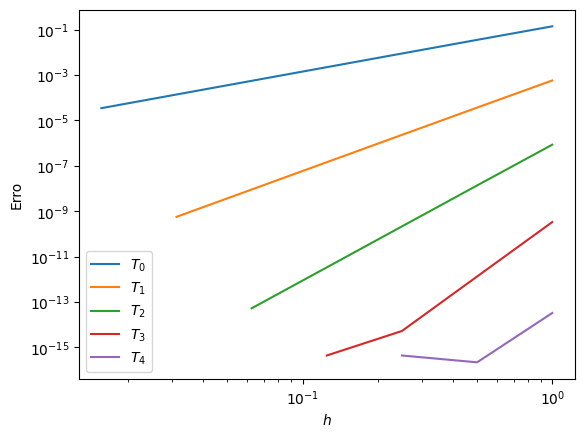

In [ ]:
## Vetor com os valores de h
hs = np.empty(0, dtype = float)
## Percorrer os valores de m
for m in range(M+1):
  ## Calcular o h correspondente
  h = (x[-1] - x[0]) / (2**m)
  ## Adicionar h ao vetor
  hs = np.append(hs,h)

## Integral exata
ex = np.exp(xmax) - np.exp(0)

## Percorrer os valores de k para estimar a ordem de convergência de T_k e plotar o erro de T_k em função de h
for k in range(0,kmax+1):

  ## a partir de T, obter o vetor contendo os valores T_k, para um $k$ fixo
  ## Note que T não tem valores calculados abaixo da diagonal secundária
  Tk = T[0: M + 1 - k, k]

  ## Vetor contendo os respectivos valores de h
  hs_k = hs[0: M + 1 - k]

  ## Vetor contendo o erro em cada aproximação T_k(m), para um k fixo
  vetor_erro_k = np.abs(ex - Tk)

  ## Calcular e imprimir a ordem de convergência de T_k estimada numericamente
  print("\nT_{}:".format(k))
  ordem_convergencia_numerica(hs_k,vetor_erro_k)

  ## Plotar erros de Tk em função de h
  plt.plot(hs_k,vetor_erro_k,label = r"$T_{}$".format(k))
  plt.xscale('log')
  plt.yscale('log')
  plt.xlabel(r"$h$")
  plt.ylabel("Erro")
  plt.legend()

# Parte 3 - Aplicação: cálculo de volume de água em uma represa.

Considere uma represa com perfil batimétrico indicado na figura abaixo, no plano $x-z$, onde $x$ é uma das direções horizontais e $z$ é a direção vertical. O perfil tem largura de $10$km, e a cota de fundo (altitude em relação ao nível do mar) é conhecida em 513 pontos equidistantes, incluindo os extremos do perfil. Com esses dados, é possível estimar o volume de água ocupado em função do nível da superfície. Por simplificação, considere que o perfil da represa seja constante ao longo da direção transversal $y$ e de comprimento $100\text{m}$ nessa direção.

Rode o código abaixo para ler o arquivo com o perfil topográfico da represa. Serão obtidos dois vetores, um com as coordenadas $x_i$ dos pontos de medição, e outro com as respectivas cotas $z_i$.



In [ ]:
# Leitura do arquivo, salvando o conteúdo em perfil.txt
import gdown
import pandas as pd

# Baixar arquivo
file_id = '1JSyMSGqVoh-5LTQsSwQmFp_BuEoXCsgV'
url = f'https://drive.google.com/uc?id={file_id}&confirm=t'
gdown.download(url, 'perfil.txt', quiet=False)

## Ler arquivo
df = pd.read_csv('perfil.txt')

df = pd.read_csv('perfil.txt', delimiter='\t')
x_input = df['x'].values
z_input = df['y'].values

# Impressão
# for i in range(x_input.size):
#   print(f"{x_input[i]:.6f} {z_input[i]:.6f}")

Downloading...
From: https://drive.google.com/uc?id=1JSyMSGqVoh-5LTQsSwQmFp_BuEoXCsgV&confirm=t
To: /content/perfil.txt
100%|██████████| 7.64k/7.64k [00:00<00:00, 4.12MB/s]


Text(0, 0.5, '$z$ (m)')

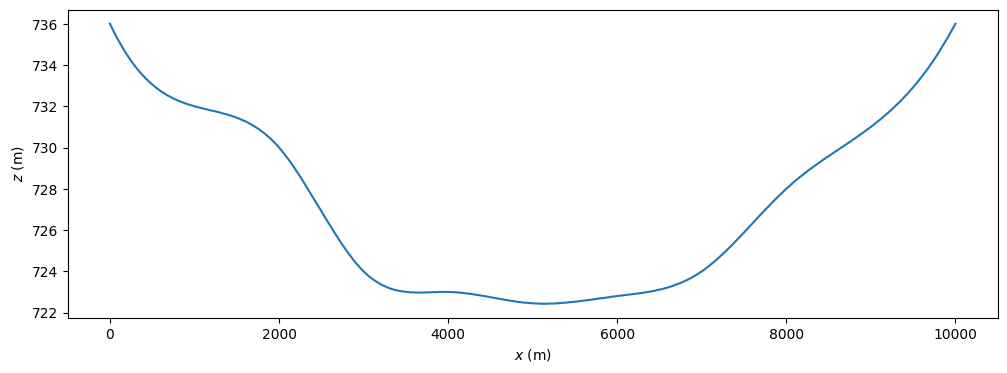

In [ ]:
## Plotar perfil
plt.figure(figsize = (12,4))
plt.plot(x_input,z_input)
plt.xlabel(r'$x$ (m)')
plt.ylabel(r'$z$ (m)')

## Questão 3.1.

Utilizando o método de Romberg e sabendo que a maior cota da superfície da água é de $736$m, estime o volume da represa quando ela está em sua capacidade máxima. Comece com $m_0 = 2$. O valor obtido será dado por $T_3(64)$.

In [ ]:
## dados para a extrapolaçãp de Romberg
m0 = 2
M = 8 # 512 = 2 * 2^8
kmax = 3

## Maior cota
ymax = 736.0

## Extrapolação de Romberg
T = extrapolacao_romberg(m0, M, kmax, x_input, np.maximum(0, ymax - z_input))

## Imprimir a matriz T com arredondamento para duas casas decimais
print("Matriz T:")
np.set_printoptions(precision=2, suppress=True)
print(T)
np.set_printoptions()

## Cálculo do volume total
V_total = 100* T[5,3]
print("\nVolume total: ", V_total)

Matriz T:
[[67750.   86583.33 87463.33 88165.98]
 [81875.   87408.33 88155.   88112.11]
 [86025.   88108.33 88112.78 88121.53]
 [87587.5  88112.5  88121.39 88120.26]
 [87981.25 88120.83 88120.28 88121.16]
 [88085.94 88120.32 88121.15 88121.38]
 [88111.72 88121.1  88121.37     0.  ]
 [88118.75 88121.36     0.       0.  ]
 [88120.7      0.       0.       0.  ]]

Volume total:  8812137.670846561


## Questão 3.2.

Suponha que a cota da superfície da represa seja dada pela variável *altura*, definida no começo deste EP em função de seu número USP. Utilizando o método de Romberg, começando com $m_0 = 2$ e obtendo a aproximação $T_3(64)$, estime a porcentagem de água em relação à capacidade total da represa.

In [ ]:
## dados para a extrapolaçãp de Romberg
m0 = 2
M = 8
kmax = 3

## Maior cota
ymax = altura

## Extrapolação de Romberg
T = extrapolacao_romberg(m0, M, kmax, x_input, np.maximum(0, ymax - z_input))

## Imprimir a matriz T com arredondamento para duas casas decimais
print("Matriz T:")
np.set_printoptions(precision=2, suppress=True)
print(T)
np.set_printoptions()

V = 100 * T[5,3]
print("\nVolume ocupado:", V)
print("Porcentagem do volume ocupado: {}%".format(V/V_total*100))

Matriz T:
[[27350.   19250.   23934.44 23501.57]
 [21275.   23641.67 23508.33 23394.89]
 [23050.   23516.67 23396.67 23324.14]
 [23400.   23404.17 23325.28 23366.97]
 [23403.12 23330.21 23366.32 23364.87]
 [23348.44 23364.06 23364.9  23363.86]
 [23360.15 23364.84 23363.87     0.  ]
 [23363.67 23363.93     0.       0.  ]
 [23363.87     0.       0.       0.  ]]

Volume ocupado: 2336385.5675943317
Porcentagem do volume ocupado: 26.513266756190845%
